In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

## Import Data 

In [3]:
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')

In [4]:
y = train.SalePrice
train = train.drop(columns=['Id', 'SalePrice'])

In [5]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (1451, 341)
Test shape: (1459, 341)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.30, random_state=0)
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (1015, 341)
X_test : (436, 341)
y_train : (1015,)
y_test : (436,)


In [7]:
stdSc = StandardScaler()
X_train = pd.DataFrame(stdSc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(stdSc.transform(X_test), columns=X_test.columns, index=X_test.index)

In [8]:
scorer = make_scorer(mean_squared_error, greater_is_better=False)

def rmse_train(model):
    r = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(r)
    
def rmse_test(model):
    r = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(r)

## KNeighborsRegressor 

In [21]:
n_neighbors = [2,5,8,11,14,17,20]
param_grids = dict(n_neighbors=n_neighbors)
model = KNeighborsRegressor()

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

Best: -0.024841 using {'n_neighbors': 5}
-0.031104 (0.005598) with: {'n_neighbors': 2}
-0.024841 (0.004655) with: {'n_neighbors': 5}
-0.025072 (0.004906) with: {'n_neighbors': 8}
-0.025541 (0.004982) with: {'n_neighbors': 11}
-0.026309 (0.005233) with: {'n_neighbors': 14}
-0.027030 (0.005395) with: {'n_neighbors': 17}
-0.027874 (0.005100) with: {'n_neighbors': 20}


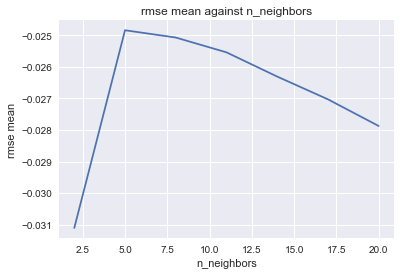

In [22]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(n_neighbors, means)
plt.title('rmse mean against n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('rmse mean')
plt.show()

In [25]:
weights = ['uniform', 'distance']
param_grids = dict(weights=weights)
model = KNeighborsRegressor()

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

Best: -0.024469 using {'weights': 'distance'}
-0.024841 (0.004655) with: {'weights': 'uniform'}
-0.024469 (0.004711) with: {'weights': 'distance'}


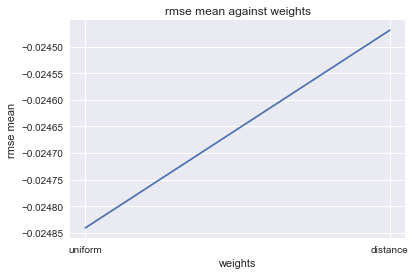

In [26]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(weights, means)
plt.title('rmse mean against weights')
plt.xlabel('weights')
plt.ylabel('rmse mean')
plt.show()

In [27]:
leaf_size = [10,30,60,100,300,600]
param_grids = dict(leaf_size=leaf_size)
model = KNeighborsRegressor(weights='distance')

gridSearch = GridSearchCV(model, param_grids, scoring=scorer, cv=10)

Best: -0.024469 using {'leaf_size': 10}
-0.024469 (0.004711) with: {'leaf_size': 10}
-0.024469 (0.004711) with: {'leaf_size': 30}
-0.024469 (0.004711) with: {'leaf_size': 60}
-0.024469 (0.004711) with: {'leaf_size': 100}
-0.024469 (0.004711) with: {'leaf_size': 300}
-0.024469 (0.004711) with: {'leaf_size': 600}


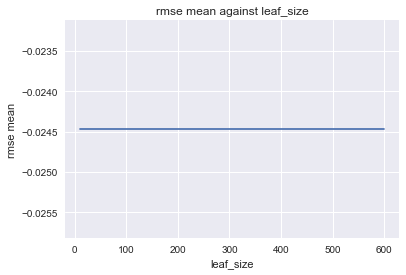

In [28]:
gridResult = gridSearch.fit(X_train, y_train)

print("Best: %f using %s" % (gridResult.best_score_, gridResult.best_params_))

means = gridResult.cv_results_['mean_test_score']
stds = gridResult.cv_results_['std_test_score']
params = gridResult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.plot(leaf_size, means)
plt.title('rmse mean against leaf_size')
plt.xlabel('leaf_size')
plt.ylabel('rmse mean')
plt.show()